In [1]:
import pandas as pd
from sklearn.datasets import load_wine

# Now you can use the library:
wine = load_wine() 
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [2]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
X.shape

(178, 13)

In [4]:
y = pd.DataFrame(wine.target, columns = ['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [5]:
y['target'].unique()

array([0, 1, 2])

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
X = pd.concat([X, y], axis = 1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
import seaborn as sns

In [9]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (23, 7)

<Axes: >

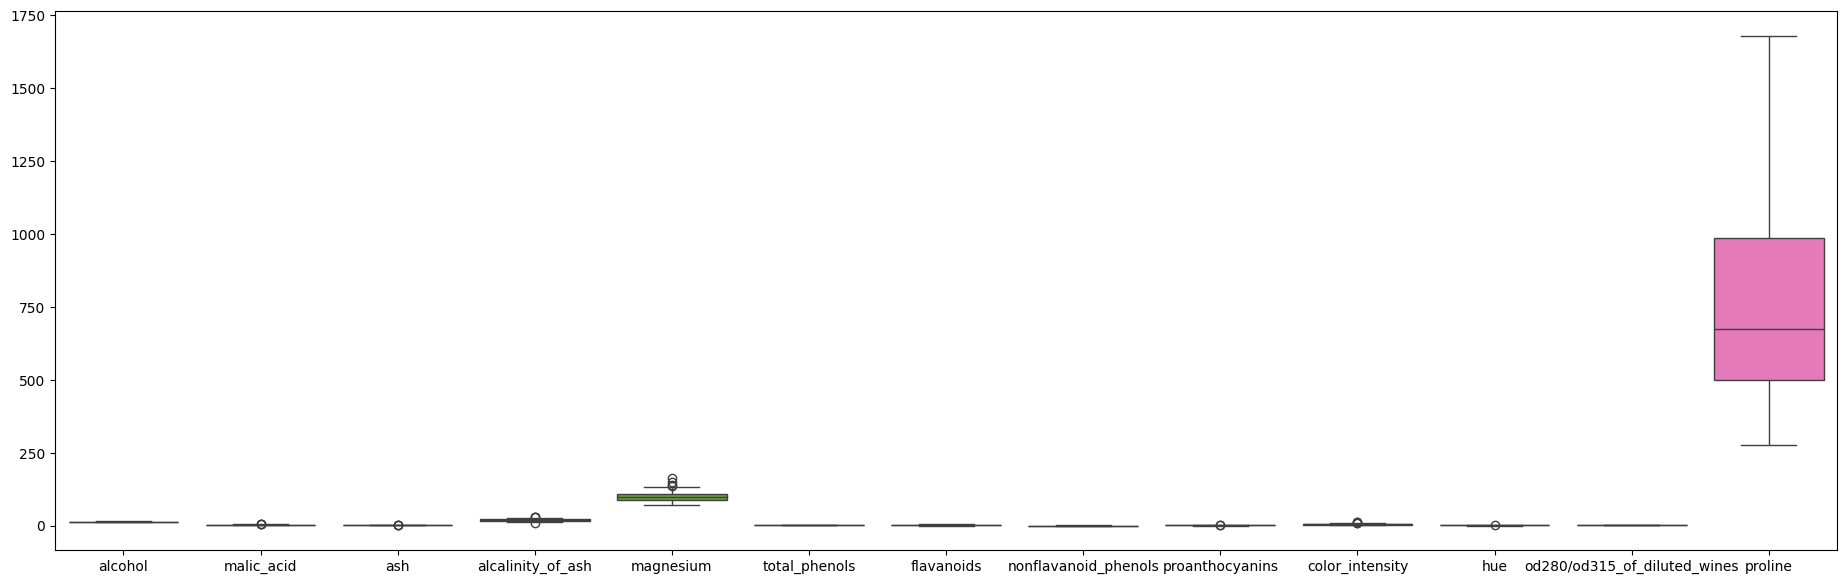

In [11]:
sns.boxplot(X[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']])

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np
Q1 = np.percentile(X['malic_acid'], 25, interpolation = 'midpoint')
Q3 = np.percentile(X['malic_acid'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [14]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
lower_bound, upper_bound

(np.float64(-0.585), np.float64(5.255))

In [16]:
X = X.drop(X[(X['malic_acid'] < lower_bound) | (X['malic_acid'] > upper_bound)].index)
X.shape

(175, 14)

In [17]:
Q1 = np.percentile(X['ash'], 25, interpolation = 'midpoint')
Q3 = np.percentile(X['ash'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(np.float64(1.6925000000000003), np.float64(3.0724999999999993))

In [18]:
X = X.drop(X[(X['ash'] < lower_bound) | (X['ash'] > upper_bound)].index)
X.shape

(172, 14)

In [19]:
Q1 = np.percentile(X['alcalinity_of_ash'], 25, interpolation = 'midpoint')
Q3 = np.percentile(X['alcalinity_of_ash'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(np.float64(10.624999999999996), np.float64(28.025000000000002))

In [20]:
X = X.drop(X[(X['alcalinity_of_ash'] < lower_bound) | (X['alcalinity_of_ash'] > upper_bound)].index)
X.shape

(170, 14)

In [21]:
Q1 = np.percentile(X['magnesium'], 25, interpolation = 'midpoint')
Q3 = np.percentile(X['magnesium'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(np.float64(59.5), np.float64(135.5))

In [22]:
X = X.drop(X[(X['magnesium'] < lower_bound) | (X['magnesium'] > upper_bound)].index)
X.shape

(167, 14)

In [23]:
Q1 = np.percentile(X['proanthocyanins'], 25, interpolation = 'midpoint')
Q3 = np.percentile(X['proanthocyanins'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(np.float64(0.23750000000000027), np.float64(2.9374999999999996))

In [24]:
X = X.drop(X[(X['proanthocyanins'] < lower_bound) | (X['proanthocyanins'] > upper_bound)].index)
X.shape

(165, 14)

In [25]:
Q1 = np.percentile(X['color_intensity'], 25, interpolation = 'midpoint')
Q3 = np.percentile(X['color_intensity'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(np.float64(-1.1999999999999997), np.float64(10.719999999999999))

In [26]:
X = X.drop(X[(X['color_intensity'] < lower_bound) | (X['color_intensity'] > upper_bound)].index)
X.shape

(162, 14)

In [27]:
Q1 = np.percentile(X['hue'], 25, interpolation = 'midpoint')
Q3 = np.percentile(X['hue'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(np.float64(0.30749999999999994), np.float64(1.6075000000000002))

In [28]:
X = X.drop(X[(X['hue'] < lower_bound) | (X['hue'] > upper_bound)].index)
X.shape

(161, 14)

In [29]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<Axes: >

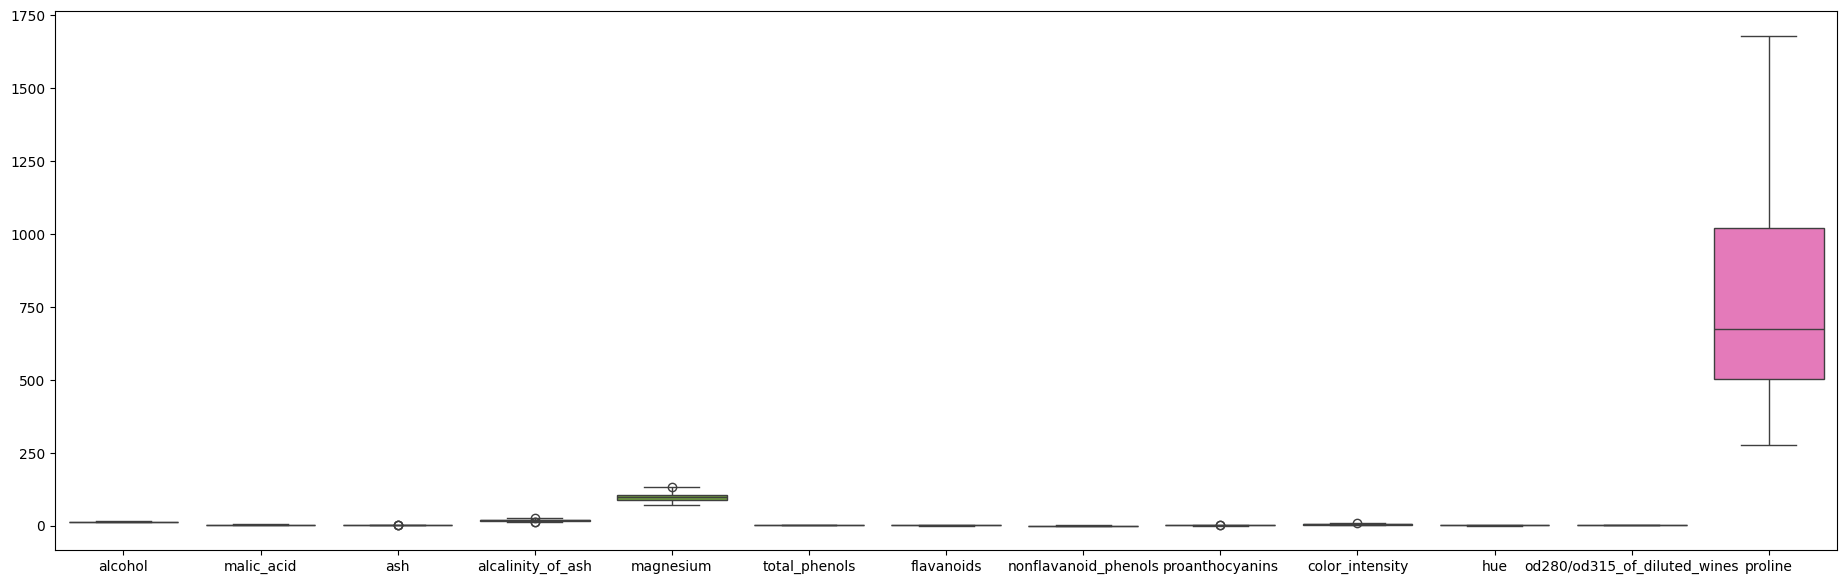

In [30]:
sns.boxplot(X[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']])

In [31]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [32]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876,0.913043
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297,0.785743
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000,0.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000,0.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000,1.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000,2.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000,2.000000


In [33]:
X.shape

(161, 14)

In [34]:
inp = X.drop(columns=['target'])
y = X['target']

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inp[:] = scaler.fit_transform(inp)

In [36]:
inp.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.824561,0.217978,0.598361,0.278481,0.890625,0.627586,0.757660,0.283019,0.752,0.463830,0.549451,0.970696,0.561341
1,0.523392,0.233708,0.360656,0.000000,0.468750,0.575862,0.674095,0.245283,0.348,0.329787,0.560440,0.780220,0.550642
2,0.511696,0.364045,0.795082,0.468354,0.484375,0.627586,0.807799,0.320755,0.960,0.468085,0.538462,0.695971,0.646933
3,0.865497,0.271910,0.655738,0.354430,0.671875,0.989655,0.877437,0.207547,0.708,0.693617,0.351648,0.798535,0.857347
4,0.535088,0.415730,0.959016,0.620253,0.750000,0.627586,0.654596,0.490566,0.564,0.323404,0.549451,0.608059,0.325963


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp, y, test_size = 0.2, random_state = 42)

In [38]:
X_train.shape, X_test.shape

((128, 13), (33, 13))

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
def validation(estimator, inp, tar):
    return cross_val_score(estimator, inp, tar).mean() * 100

In [41]:
validation(LogisticRegression(), X_train, y_train)

np.float64(99.23076923076923)

In [42]:
validation(RandomForestClassifier(), X_train, y_train)

np.float64(97.66153846153847)

In [43]:
validation(SVC(), X_train, y_train)

np.float64(97.66153846153847)

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
pred = model.predict(X_test)
y_test[:5]

113    1
117    1
156    2
57     0
101    1
Name: target, dtype: int64

In [46]:
pred[:5]

array([1, 1, 2, 0, 1])

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Model Accurary : {accuracy_score(y_test, pred) * 100}')

Model Accurary : 100.0


In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



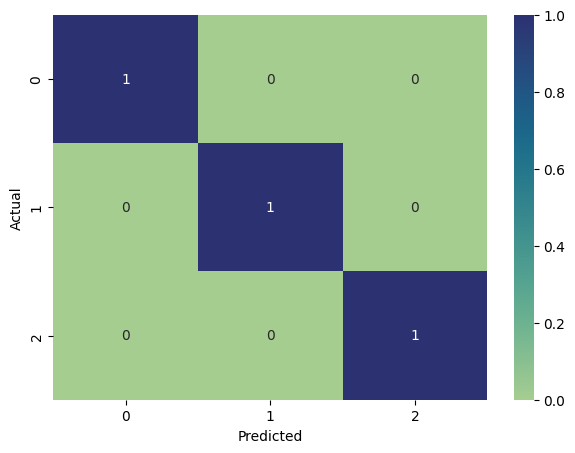

In [49]:
plt.rcParams['figure.figsize'] = (7, 5)
cf =  confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('Predicted');
plt.ylabel('Actual');